In [33]:
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from openpyxl import load_workbook

In [15]:
import cv2
import pytesseract
import re

In [14]:
def extract_digit_with_following_chars(input_string):
    
    pattern = r'\d{1,3}.*?m'
    
    
    matches = re.findall(pattern, input_string)
    
    return matches

In [9]:
def scale_in_meters(text):
    if(text=="1 km" or text=="1km" or text=="7km" or text=="7 km"):
        dis=1000
    elif(text=="2 km" or text=="2km"):
        dis=2000
    elif(text=="5 km" or text=="5km"):
        dis=5000
    elif(text=="500m" or text=="500 m"):
        dis=500
    elif(text=="200m" or text=="200 m"):
        dis=200
    elif(text=="100m" or text=="100 m"):
        dis=100
    elif(text=="50m" or text=="50 m"):
        dis=50
    elif(text=="20m" or text=="20 m"):
        dis=20
    elif(text=="10m" or text=="10 m"):
        dis=10
    return dis

In [10]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [38]:
workbook=load_workbook(r"C:\IIM_Project\Sample.xlsx")
sheet = workbook.active

Extracted Text: 500m


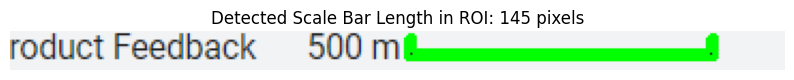

Extracted Text: 1km


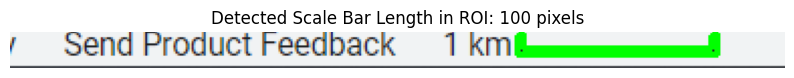

Extracted Text: 1km


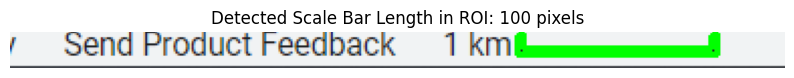

Extracted Text: 2 km


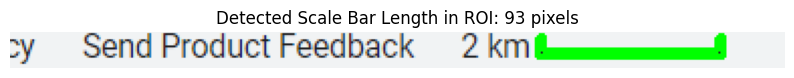

Extracted Text: 2km


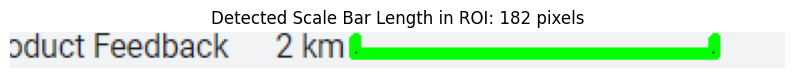

Extracted Text: 200m


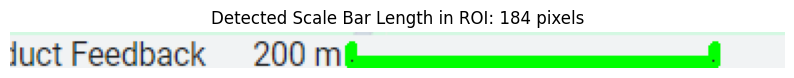

In [39]:
for row in range(4, sheet.max_row + 1):
    image_path=sheet.cell(row=row, column=3).value
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    x = width - 350 
    y = height - 100  
    w = 350  
    h = 100 
    roi = image[y:y+h, x:x+w]
    extracted_text = pytesseract.image_to_string(roi)
    result = extract_digit_with_following_chars(extracted_text)
    if len(result)==0:
        print("No scale")
        continue

    print('Extracted Text:', result[-1])
    sheet.cell(row=row, column=4, value=result[-1])
    height, width, _ = image.shape


    roi = image[int(0.98*height):height, int(0.8*width):width]


    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)


    _, binary_roi = cv2.threshold(gray_roi, 50, 255, cv2.THRESH_BINARY_INV)


    edges_roi = cv2.Canny(binary_roi, 50, 150)


    contours_roi, _ = cv2.findContours(edges_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    max_length = 0
    scale_bar_contour = None


    for contour in contours_roi:
   
        x, y, w, h = cv2.boundingRect(contour)
    
        area = cv2.contourArea(contour)
  
        if w > max_length and h > 10 and area > 50:  
            max_length = w
            scale_bar_contour = contour


    if scale_bar_contour is not None:
        cv2.drawContours(roi, [scale_bar_contour], -1, (0, 255, 0), 2)
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected Scale Bar Length in ROI: {max_length} pixels")
    plt.axis('off')
    plt.show()


    sheet.cell(row=row, column=6, value=max_length)
    scale_bar_length_m = scale_in_meters(result[-1])
    meters_per_pixel=scale_bar_length_m/max_length
    sheet.cell(row=row, column=5, value=scale_bar_length_m)
    sheet.cell(row=row, column=7, value=meters_per_pixel)
    
    
    
   


workbook.save(filename=r"C:\IIM_Project\Sample.xlsx")
